# Evelyn Pu

## Research question/interests

Through EDA, I found that the two questions of which type of users are more numerous and whether users are affected by weekdays or non-working days have been solved. But other issues need to continue to be studied.

My main research questions are ***the characteristics of two types of users using bike-sharing in different environments, i.e., how they are affected by weather (temperature/humidity/wind speed), and by holidays, respectively.***


To figure out this, I might analyze：
#### 1. Is the number of users affected by humidity? Is it affected by wind speed?

- Just like the EDA analysis in PM3, I will create a scatterplot to show whether humidity and wind speed are correlated with the number of users.

#### 2. How are the two types of users, casual and registered, affected by weather conditions, respectively? What are their characteristics? Are the values positively or negatively correlated?
 
 - Convert the "dteday" column to a datetime format

- Check for missing or null values and handle them appropriately


 - Create scatter plots and heatmaps to visualize the relationship between temperature, humidity, windspeed, and the number of registered and casual users

- Calculate correlation coefficients to measure the strength of the relationship between these variables

 - Aggregate the data by weather condition and calculate summary statistics for the number of registered and casual users (e.g., mean, median, standard deviation)

 - Create box plots to visualize the distribution of the number of users for each weather condition and each user type

#### 3. How are the two types of users affected by holidays? Do they both prefer non-holiday use of bicycle sharing?

  - check if there are any missing values in dataset
 
  - group the data by the holiday column and calculate the mean of the casual and registered columns separately for each group.
  
  - use a bar plot or box plot to visualize the average number of casual and registered users on holidays and non-holidays.
  

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
day = pd.read_csv("../data/raw/day.csv")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
hour= pd.read_csv("../data/raw/hour.csv")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Data Analysis

After looking at my dataset, I decided to just use the day.csv file because it contained the information I needed, including dates, whether it was a holiday, whether it was a weekend, and weather information. There was no need to use any other dataset.

In [6]:
path0="../data/raw/day.csv"
df= pd.read_csv(path0)
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspee

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [16]:
df.shape

(731, 16)

In [17]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# I am going to cleaning my dataset.

In [20]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**There was some data in the dataset that I didn't need, and now I am going to edit the dataset to make it fit my research question**

In [33]:
# from the source: https://business-science.github.io/timetk/reference/bike_sharing_daily.html
# I can know that the 'weathersit' column represents:
#    1: Clear, Few clouds, Partly cloudy, Partly cloudy
#    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

perfect=df.drop(['instant','dteday','yr','season','mnth','holiday','workingday','weekday','atemp'],axis=1)
perfect


,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2,0.344167,0.805833,0.160446,331,654,985
1,2,0.363478,0.696087,0.248539,131,670,801
2,1,0.196364,0.437273,0.248309,120,1229,1349
3,1,0.200000,0.590435,0.160296,108,1454,1562
4,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...
726,2,0.254167,0.652917,0.350133,247,1867,2114
727,2,0.253333,0.590000,0.155471,644,2451,3095
728,2,0.253333,0.752917,0.124383,159,1182,1341
729,1,0.255833,0.483333,0.350754,364,1432,1796


In [34]:
perfect.describe()

,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [39]:
#relationship analysis
relationship= perfect.corr()
relationship


,weathersit,temp,hum,windspeed,casual,registered,cnt
weathersit,1.000000,-0.120602,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,-0.120602,1.000000,0.126963,-0.157944,0.543285,0.540012,0.627494
hum,0.591045,0.126963,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,0.039511,-0.157944,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,-0.247353,0.543285,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,-0.260388,0.540012,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,-0.297391,0.627494,-0.100659,-0.234545,0.672804,0.945517,1.000000


<AxesSubplot: >

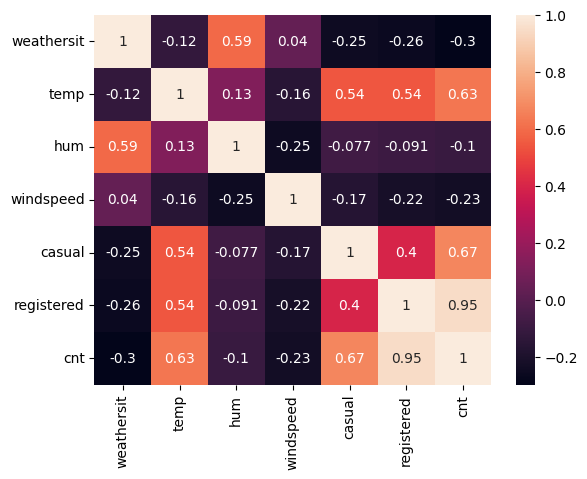

In [40]:
sns.heatmap(relationship, xticklabels=relationship.columns, yticklabels=relationship.columns, annot=True)
#TRYING TO SEE ALL THE VARIABLES TOGETHER TO TRY AND NOTICE ANY RLATIONSHIPS

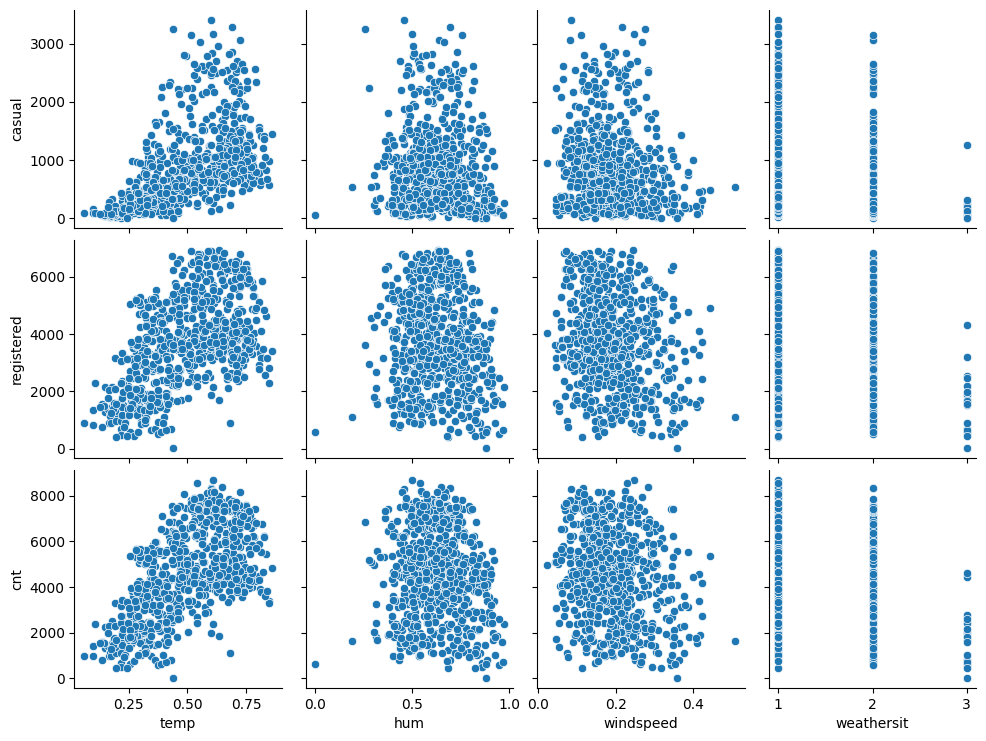

In [44]:
sns.pairplot(perfect, x_vars =["temp", "hum", "windspeed","weathersit"], y_vars = ["casual", "registered", "cnt"])

**From the graph, we can know that there is a positive relationship between temperature and the number of users. And people are biased to use bike-sharing in weather condition 1.**

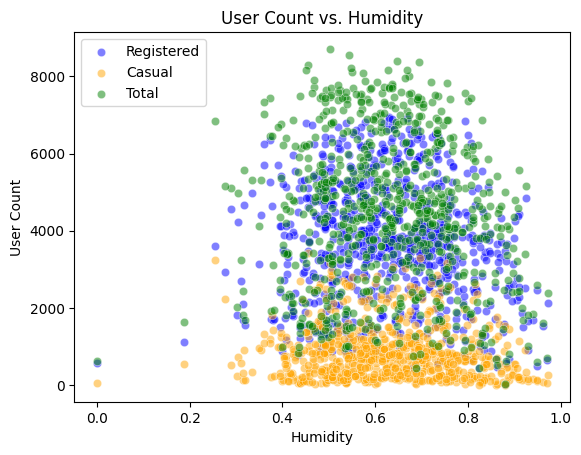

In [59]:
# Plot the registered user count against humidity
sns.scatterplot(x='hum', y='registered', data=df, color='blue', alpha=0.5, label='Registered')

# Plot the casual user count against humidity
sns.scatterplot(x='hum', y='casual', data=df, color='orange', alpha=0.5, label='Casual')

# Plot the total user count against humidity
sns.scatterplot(x='hum', y='cnt', data=df, color='green', alpha=0.5, label='Total')

# Set the x-axis and y-axis labels
plt.xlabel('Humidity')
plt.ylabel('User Count')

# Set the title
plt.title('User Count vs. Humidity')

# Add a legend
plt.legend()

# Show the plot
plt.show()


**From the graph, we know that both two types of users prefers a specific humidity range, neither dry nor too humid. generally they prefer humidity >0.5**

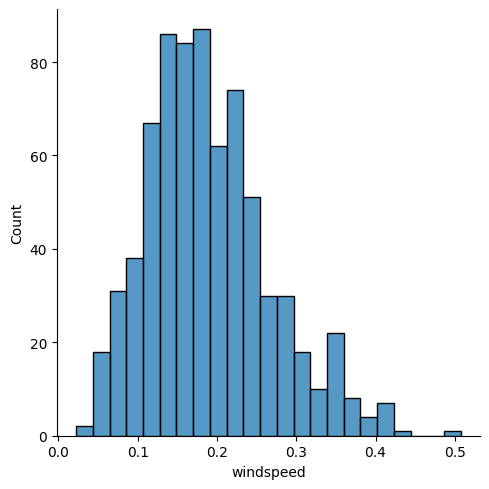

In [65]:
sns.displot(perfect['windspeed'])

**As the graph shows, the wind speed is usually between 0.1 and 0.26, which helps me filter the data**

In [71]:
perfect.nunique()
# we can see that there is only 3 fixed wheather conditions

weathersit      3
temp          499
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [68]:
perfect = perfect.dropna(axis=0)
perfect.shape

(731, 7)

In [69]:
perfect

,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2,0.344167,0.805833,0.160446,331,654,985
1,2,0.363478,0.696087,0.248539,131,670,801
2,1,0.196364,0.437273,0.248309,120,1229,1349
3,1,0.200000,0.590435,0.160296,108,1454,1562
4,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...
726,2,0.254167,0.652917,0.350133,247,1867,2114
727,2,0.253333,0.590000,0.155471,644,2451,3095
728,2,0.253333,0.752917,0.124383,159,1182,1341
729,1,0.255833,0.483333,0.350754,364,1432,1796


## Method Chaining

In [75]:
import pandas as pd
import numpy as np

    
def first_python_module(url_or_path_to_csv_file):
    
       # Method Chain 1 (Load data,rename columns, get rid of null values and drop necessary data with missing data)\n",
    
        df1 = (
              pd.read_csv(url_or_path_to_csv_file)    
              .drop(['instant','dteday','yr','season','mnth','holiday','workingday','weekday','atemp'], axis=1)
             .rename(columns={'cnt': 'total users', 'weathersit':'weathercondition'})  
            .dropna(axis=0)
            )
        
        df2 = (
            df1.dropna(subset=['windspeed','hum','temp','weathercondition','casual','registered','total users'])
                .loc[lambda x: x['windspeed']>0.1]
                .loc[lambda x: x['windspeed'] < 0.26]
                .loc[lambda x: x['hum'] > 0.5]
                .assign(OverallWeatherCondition= (df1['temp'] * 0.3)+ (df1['hum'] * 0.4)+(df1['windspeed'] * 0.3))
                .reset_index(drop = True) 
        )
    
        return df2

In [96]:
#from analysis.code import project_functions # This is called a relative import
#df = project_functions.load_and_process("../data/raw/day.csv")
#df

In [94]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
weathercondition,440.0,1.445455,0.541429,1.000000,1.000000,1.000000,2.000000,3.000000
temp,440.0,0.524172,0.177756,0.160870,0.356667,0.545416,0.682917,0.848333
hum,440.0,0.672286,0.109993,0.501667,0.579896,0.665000,0.744688,0.962500
windspeed,440.0,0.173735,0.042217,0.100742,0.137289,0.170710,0.209576,0.258713
casual,440.0,898.481818,683.062196,9.000000,415.250000,750.500000,1153.750000,3283.000000
registered,440.0,3794.429545,1502.371416,416.000000,2732.000000,3771.500000,4862.750000,6946.000000
total users,440.0,4692.911364,1855.697308,431.000000,3522.250000,4636.500000,6143.250000,8714.000000
OverallWeatherCondition,440.0,0.478287,0.069701,0.291838,0.424589,0.492235,0.527946,0.623824
